In [49]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')


In [48]:
df=pd.read_csv("/Users/user/Desktop/housingdata.csv")
df

,Unnamed: 0,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
0,1,132500,0.09,No,42,50000,No,No,Electric,Electric,Private,906,1,1.0,5
1,2,181115,0.92,No,0,22300,No,No,Gas,Hot Water,Private,1953,0,2.5,6
2,3,109000,0.19,No,133,7300,No,No,Gas,Hot Water,Public,1944,1,1.0,8
3,4,155000,0.41,No,13,18700,No,No,Gas,Hot Air,Private,1944,1,1.5,5
4,5,86060,0.11,No,0,15000,Yes,Yes,Gas,Hot Air,Public,840,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1724,289000,0.38,No,32,24200,No,No,Gas,Hot Water,Public,2310,1,2.5,11
1724,1725,285000,0.94,No,37,36200,No,No,Gas,Hot Water,Public,2564,1,2.5,11
1725,1726,194900,0.39,No,9,20400,No,No,Gas,Hot Air,Public,1099,0,1.0,3
1726,1727,125000,0.24,No,48,16800,No,No,Gas,Hot Air,Public,1225,1,1.0,7


In [43]:
df.keys()

Index(['price', 'lot_size', 'waterfront', 'age', 'land_value', 'construction',
       'air_cond', 'fuel', 'heat', 'sewer', 'living_area', 'fireplaces',
       'bathrooms', 'rooms'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1728 non-null   int64  
 1   price         1728 non-null   int64  
 2   lot_size      1728 non-null   float64
 3   waterfront    1728 non-null   object 
 4   age           1728 non-null   int64  
 5   land_value    1728 non-null   int64  
 6   construction  1728 non-null   object 
 7   air_cond      1728 non-null   object 
 8   fuel          1728 non-null   object 
 9   heat          1728 non-null   object 
 10  sewer         1728 non-null   object 
 11  living_area   1728 non-null   int64  
 12  fireplaces    1728 non-null   int64  
 13  bathrooms     1728 non-null   float64
 14  rooms         1728 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 202.6+ KB


In [41]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [44]:
df.head()

,price,lot_size,waterfront,age,land_value,construction,air_cond,fuel,heat,sewer,living_area,fireplaces,bathrooms,rooms
0,132500,0.09,No,42,50000,No,No,Electric,Electric,Private,906,1,1.0,5
1,181115,0.92,No,0,22300,No,No,Gas,Hot Water,Private,1953,0,2.5,6
2,109000,0.19,No,133,7300,No,No,Gas,Hot Water,Public,1944,1,1.0,8
3,155000,0.41,No,13,18700,No,No,Gas,Hot Air,Private,1944,1,1.5,5
4,86060,0.11,No,0,15000,Yes,Yes,Gas,Hot Air,Public,840,0,1.0,3


# simple linear regression/univariate regression


In [82]:
df[['price', 'living_area']]

,price,living_area
0,132500,906
1,181115,1953
2,109000,1944
3,155000,1944
4,86060,840
...,...,...
1723,289000,2310
1724,285000,2564
1725,194900,1099
1726,125000,1225


In [83]:
X = df['living_area']
Y = df['price']

In [84]:
X.head()


0     906
1    1953
2    1944
3    1944
4     840
Name: living_area, dtype: int64

In [85]:
Y.head()

0    132500
1    181115
2    109000
3    155000
4     86060
Name: price, dtype: int64

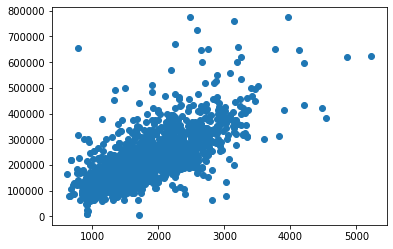

In [86]:
#scatter plot of X and Y
plt.scatter(X,Y)
plt.show()

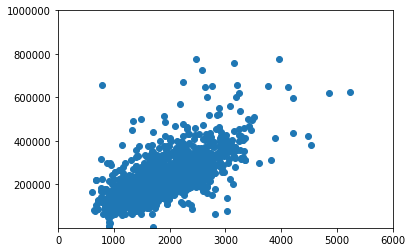

In [87]:
#arranging plot for better visualization
plt.scatter(X,Y)
plt.axis([0,6000, 1, 1000000])
plt.show()

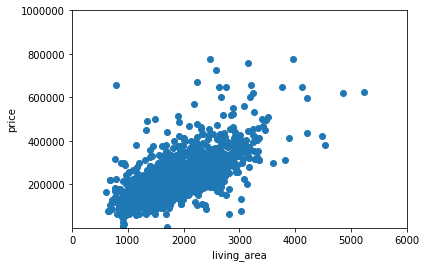

In [91]:
plt.scatter(X,Y)
plt.axis([0,6000, 1, 1000000])
plt.xlabel('living_area')
plt.ylabel('price')
plt.show()

In [95]:
type('price')

str

In [103]:
#regression line
X1 = sm.add_constant(X)
reg = sm.OLS(Y,X1).fit()

In [ ]:
#Expected value of price
#price^=const+113.12*living_area
#1.344e+4 is equal to 13440
#calculate expeced price for living_area=5000


In [111]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     1779.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          9.49e-268
Time:                        23:03:09   Log-Likelihood:                -21707.
No. Observations:                1728   AIC:                         4.342e+04
Df Residuals:                    1726   BIC:                         4.343e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.344e+04   4992.353      2.692      0.007    3647.696    2.32e+04
living_area   113.1225      2.682     42.173      0.000     107.862     118.384
==============================================================================
Omnibus:                      685.260   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5308.617
Skew:                           1.658   Prob(JB):                         0.00
Kurtosis:                      10.920   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
exp_price=13440+113.12*5000
exp_price#compare this with data in above graph, you can be very much approximated(600000).

579040.0

In [115]:
#OLs without intercept

In [116]:
reg1=sm.OLS(Y,X).fit()
reg1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                          1.796e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):                        0.00
Time:                        23:13:08   Log-Likelihood:                         -21710.
No. Observations:                1728   AIC:                                  4.342e+04
Df Residuals:                    1727   BIC:                                  4.343e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
living_area   119.9313      0.895    134.031      0.000     118.176     121.686
==============================================================================
Omnibus:                      650.108   Durbin-Watson:                   1.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4985.340
Skew:                           1.559   Prob(JB):                         0.00
Kurtosis:                      10.715   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Alpha, beta, R^2

In [155]:
slope, intercept, r_value, p_value, std_error = stats.linregress(X,Y)#compare with reg above

In [156]:
slope

113.12254184680961

In [157]:
intercept

13439.394004889386

In [158]:
r_value

0.7123902334268238

In [159]:
p_value

9.486239939676993e-268

In [160]:
r_value **2

0.5074998446819246

In [162]:
std_error

2.6823410034486286